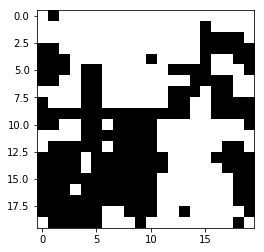

In [20]:
import numpy as np
import matplotlib.pyplot as plt

shape = (20, 20)

# Spin configuration
spins = np.random.choice([-1, 1], size=shape)

# Magnetic moment
moment = 1

# External magnetic field
field = np.full(shape, 0)

# Temperature (in units of energy)
temperature = .1

# Interaction (ferromagnetic if positive, antiferromagnetic if negative)
interaction = 1

def get_probability(energy1, energy2, temperature):
  return np.exp((energy1 - energy2) / temperature)

def get_energy(spins):
  return -np.sum(
    interaction * spins * np.roll(spins, 1, axis=0) +
    interaction * spins * np.roll(spins, -1, axis=0) +
    interaction * spins * np.roll(spins, 1, axis=1) +
    interaction * spins * np.roll(spins, -1, axis=1)
  )/2 - moment * np.sum(field * spins)

def update(spins, temperature):
  spins_new = np.copy(spins)
  i = np.random.randint(spins.shape[0])
  j = np.random.randint(spins.shape[1])
  spins_new[i, j] *= -1

  current_energy = get_energy(spins)
  new_energy = get_energy(spins_new)
  if get_probability(current_energy, new_energy, temperature) > np.random.random():
    return spins_new
  else:
    return spins

plt.ion()
plt.show()

im = plt.imshow(spins, cmap='gray', vmin=-1, vmax=1, interpolation='none')
t = 0
while t<1000:
  if t % 10 == 0:
    im.set_data(spins)
    plt.draw()
  spins = update(spins, temperature)
  plt.pause(.001)
  t += 1